In [11]:
from Bio import SeqIO
import bioframe as bf
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!ls genome

Arabidopsis_halleri.fa.gz	  Brassica_napus.fa.gz
Arabidopsis_lyrata.fa.gz	  Brassica_oleracea.fa.gz
Arabidopsis_thaliana.fa.gz	  Brassica_rapa.fa.gz
Arabidopsis_thaliana.test.fa.gz   Camelina_sativa.fa.gz
Arabidopsis_thaliana.train.fa.gz  Eutrema_salsugineum.fa.gz
Arabis_alpina.fa.gz


In [20]:
# https://www.ncbi.nlm.nih.gov/genome/?term=Arabidopsis+thaliana
# https://www.ncbi.nlm.nih.gov/genome/4?genome_assembly_id=380024
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz

wget: /global/software/sl-7.x86_64/modules/langs/python/3.7/lib/libuuid.so.1: no version information available (required by wget)
--2022-09-03 17:10:09--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/735/GCF_000001735.4_TAIR10.1/GCF_000001735.4_TAIR10.1_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.228, 130.14.250.12, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37482339 (36M) [application/x-gzip]
Saving to: 'GCF_000001735.4_TAIR10.1_genomic.fna.gz'

100%[======================================>] 37,482,339  9.86MB/s   in 4.5s   

2022-09-03 17:10:14 (7.89 MB/s) - 'GCF_000001735.4_TAIR10.1_genomic.fna.gz' saved [37482339/37482339]



In [29]:
!wget https://www.arabidopsis.org/download_files/Genes/TAIR10_genome_release/TAIR10_chromosome_files/TAIR10_chr_all.fas.gz

wget: /global/software/sl-7.x86_64/modules/langs/python/3.7/lib/libuuid.so.1: no version information available (required by wget)
--2022-09-03 17:25:15--  https://www.arabidopsis.org/download_files/Genes/TAIR10_genome_release/TAIR10_chromosome_files/TAIR10_chr_all.fas.gz
Resolving www.arabidopsis.org (www.arabidopsis.org)... 52.88.10.157
Connecting to www.arabidopsis.org (www.arabidopsis.org)|52.88.10.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35981237 (34M) [application/x-gzip]
Saving to: 'TAIR10_chr_all.fas.gz'

100%[======================================>] 35,981,237  47.8MB/s   in 0.7s   

2022-09-03 17:25:16 (47.8 MB/s) - 'TAIR10_chr_all.fas.gz' saved [35981237/35981237]



In [22]:
!zcat GCF_000001735.4_TAIR10.1_genomic.fna.gz | grep ">"

>NC_003070.9 Arabidopsis thaliana chromosome 1 sequence
>NC_003071.7 Arabidopsis thaliana chromosome 2 sequence
>NC_003074.8 Arabidopsis thaliana chromosome 3 sequence
>NC_003075.7 Arabidopsis thaliana chromosome 4 sequence
>NC_003076.8 Arabidopsis thaliana chromosome 5 sequence
>NC_037304.1 Arabidopsis thaliana ecotype Col-0 mitochondrion, complete genome
>NC_000932.1 Arabidopsis thaliana chloroplast, complete genome


In [30]:
!zcat TAIR10_chr_all.fas.gz | grep ">"

>Chr1 CHROMOSOME dumped from ADB: Feb/3/09 16:9; last updated: 2009-02-02
>Chr2 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02
>Chr3 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02
>Chr4 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02
>Chr5 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02
>ChrC CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2005-06-03
>ChrM TPA_asm: Arabidopsis thaliana ecotype Col-0 mitochondrion, complete genome, CHROMOSOME dumped from NCBI: Oct/16/20; last updated: 2018-10-10


In [50]:
genome_path = "genome/Arabidopsis_thaliana.fa.gz"  # ensembl. has too much soft masking. used to be. now a new file.
#genome_path = "GCF_000001735.4_TAIR10.1_genomic.fna.gz"  # refseq
#genome_path = "TAIR10_chr_all.fas.gz"  # arabidopsis.org ;  is not masked

with gzip.open(genome_path, "rt") as handle:
    genome = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))

In [51]:
chr1 = np.array(list(str(genome['1'].seq)))
#chr1 = np.array(list(str(genome['NC_003070.9'].seq)))
#chr1 = np.array(list(str(genome['Chr1'].seq)))

chr1[:10]

array(['C', 'C', 'C', 'T', 'A', 'A', 'A', 'C', 'C', 'C'], dtype='<U1')

In [52]:
np.char.islower(chr1).mean()

0.07099419472492653

In [53]:
a = np.isin(chr1, list("ACGT")).sum()
b = np.isin(chr1, list("acgt")).sum()
a, b, b/(a+b)   # 0.28 in ensembl, 0.22 in refseq, 0.13 in PlantRegMap, 0.07 after filtering

(28103165, 2160147, 0.07137840696352071)

In [40]:
x = np.isin(chr1, list("acgt"))
x

array([ True,  True,  True, ...,  True,  True,  True])

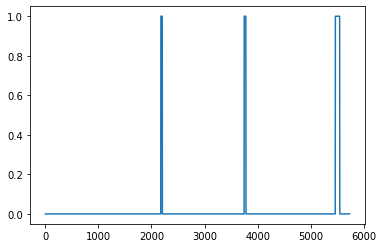

In [41]:
plt.plot(x[148874:154609])

In [16]:
repeats = pd.read_csv("../../data/mlm/repeats.bed.gz", sep="\t").rename(columns=dict(genoName="chrom", genoStart="start", genoEnd="end"))
repeats = repeats.query('chrom == "Chr1"')
repeats

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,10,444,191,54,76,Chr1,12582773,12582920,-17844751,-,Helitron1,RC,Helitron,-9953,5856,5713,5
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6
2,10,2521,72,3,2,Chr1,14676131,14685672,-15741999,-,AR3,Satellite,Satellite,-73,9553,1,6
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8
4,11,537,291,44,131,Chr1,18873944,18874466,-11553205,-,Atlantys3_LTR,LTR,Gypsy,-12,482,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,817,18,175,0,0,Chr1,30420419,30420451,-7220,+,(AT)n,Simple_repeat,Simple_repeat,1,32,0,1
17243,817,12,43,83,0,Chr1,30421948,30421972,-5699,+,(TGTTG)n,Simple_repeat,Simple_repeat,1,26,0,1
17244,817,19,128,75,18,Chr1,30422420,30422473,-5198,+,(CTTCTT)n,Simple_repeat,Simple_repeat,1,56,0,1
17245,817,12,259,0,24,Chr1,30424200,30424243,-3428,+,A-rich,Low_complexity,Low_complexity,1,42,0,1


In [18]:
repeats = bf.merge(repeats)
repeats

,chrom,start,end,n_intervals
0,Chr1,0,107,1
1,Chr1,1065,1097,1
2,Chr1,1154,1187,1
3,Chr1,4290,4328,1
4,Chr1,5679,5702,1
...,...,...,...,...
15199,Chr1,30420419,30420451,1
15200,Chr1,30421948,30421972,1
15201,Chr1,30422420,30422473,1
15202,Chr1,30424200,30424243,1


In [19]:
(repeats.end-repeats.start).sum()

4113314

In [35]:
repeats.head(50)

,chrom,start,end,n_intervals
0,Chr1,0,107,1
1,Chr1,1065,1097,1
2,Chr1,1154,1187,1
3,Chr1,4290,4328,1
4,Chr1,5679,5702,1
5,Chr1,8668,8699,1
6,Chr1,9960,10030,1
7,Chr1,10813,10885,1
8,Chr1,11914,11976,2
9,Chr1,11984,12001,1


In [3]:
repeats = pd.read_csv("../../data/mlm/repeats.bed.gz", sep="\t").rename(columns=dict(genoName="chrom", genoStart="start", genoEnd="end"))
repeats

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,10,444,191,54,76,Chr1,12582773,12582920,-17844751,-,Helitron1,RC,Helitron,-9953,5856,5713,5
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6
2,10,2521,72,3,2,Chr1,14676131,14685672,-15741999,-,AR3,Satellite,Satellite,-73,9553,1,6
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8
4,11,537,291,44,131,Chr1,18873944,18874466,-11553205,-,Atlantys3_LTR,LTR,Gypsy,-12,482,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69340,587,238,156,0,0,ChrM,361356,361401,-5523,-,SSU-rRNA_Ath,rRNA,rRNA,-16,1886,1842,6
69341,587,278,263,0,0,ChrM,361523,361599,-5325,-,SSU-rRNA_Ath,rRNA,rRNA,-164,1738,1663,6
69342,587,582,289,31,44,ChrM,362179,362407,-4517,-,SSU-rRNA_Ath,rRNA,rRNA,-481,1421,1197,6
69343,587,336,258,62,42,ChrM,364854,365016,-1908,+,LSU-rRNA_Ath,rRNA,rRNA,797,961,-2414,6


In [4]:
repeats.sort_values("swScore")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
22219,632,11,244,0,0,Chr2,6192965,6192999,-13505290,+,(TTTATT)n,Simple_repeat,Simple_repeat,1,34,0,2
63237,704,11,150,70,36,Chr5,15698848,15698893,-11276609,+,A-rich,Low_complexity,Low_complexity,1,46,0,5
31825,629,11,197,39,59,Chr3,5889146,5889198,-17570632,+,(AGATGA)n,Simple_repeat,Simple_repeat,1,51,0,2
52359,698,11,297,18,18,Chr4,14858173,14858228,-3726828,+,(ATCACA)n,Simple_repeat,Simple_repeat,1,55,0,4
51559,684,11,208,0,29,Chr4,13011633,13011668,-5573388,+,A-rich,Low_complexity,Low_complexity,1,34,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61397,685,131700,0,0,0,Chr5,13205151,13219875,-13755627,+,Arnold3,DNA,MULE-MuDR,1,14724,0,5
10,85,131959,15,5,3,Chr1,12713487,12728541,-17699130,+,Vandal2,DNA,MULE-MuDR,1,15072,-181,5
38089,695,138172,0,0,0,Chr3,14519912,14535245,-8924585,+,Helitron3,RC,Helitron,1,15333,0,3
54058,83,162394,0,0,0,Chr5,11001025,11018940,-15956562,-,Vandal5,DNA,MULE-MuDR,0,17915,1,5


<AxesSubplot:>

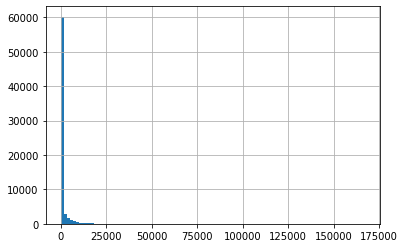

In [6]:
repeats.swScore.hist(bins=100)

<AxesSubplot:>

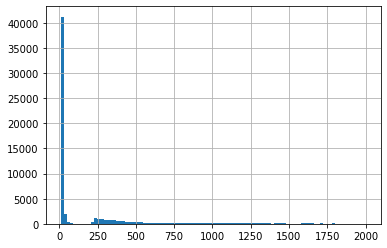

In [9]:
repeats[repeats.swScore < 2000].swScore.hist(bins=100)

<AxesSubplot:xlabel='swScore', ylabel='repClass'>

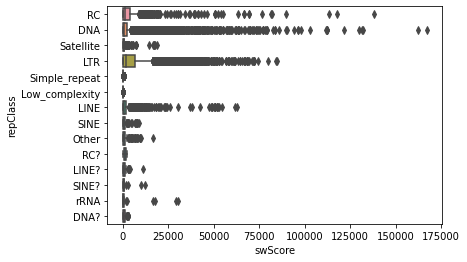

In [16]:
sns.boxplot(
    data=repeats,
    y="repClass",
    x="swScore",
)

In [17]:
repeats.sort_values("swScore").head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
22219,632,11,244,0,0,Chr2,6192965,6192999,-13505290,+,(TTTATT)n,Simple_repeat,Simple_repeat,1,34,0,2
63237,704,11,150,70,36,Chr5,15698848,15698893,-11276609,+,A-rich,Low_complexity,Low_complexity,1,46,0,5
31825,629,11,197,39,59,Chr3,5889146,5889198,-17570632,+,(AGATGA)n,Simple_repeat,Simple_repeat,1,51,0,2
52359,698,11,297,18,18,Chr4,14858173,14858228,-3726828,+,(ATCACA)n,Simple_repeat,Simple_repeat,1,55,0,4
51559,684,11,208,0,29,Chr4,13011633,13011668,-5573388,+,A-rich,Low_complexity,Low_complexity,1,34,0,4
50861,671,11,218,22,44,Chr4,11356055,11356101,-7228955,+,(CAACAC)n,Simple_repeat,Simple_repeat,1,45,0,4
52362,698,11,328,0,0,Chr4,14867600,14867649,-3717407,+,(TCTCCTC)n,Simple_repeat,Simple_repeat,1,49,0,4
19435,605,11,225,48,48,Chr2,2736842,2736904,-16961385,+,(ATTATGT)n,Simple_repeat,Simple_repeat,1,62,0,1
33317,653,11,141,0,88,Chr3,8997703,8997740,-14462090,+,(TATATG)n,Simple_repeat,Simple_repeat,1,34,0,3
52363,698,11,128,88,0,Chr4,14868496,14868530,-3716526,+,(TTTTCAA)n,Simple_repeat,Simple_repeat,1,37,0,4


In [19]:
repeats[~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])].sort_values(["swScore", "milliDiv"], ascending=[True, False]).head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
21424,624,225,331,16,16,Chr2,5215515,5215638,-14482651,-,ATMUNX1,DNA,MULE-MuDR,0,377,255,1
50284,663,225,327,10,0,Chr4,10267422,10267523,-8317533,-,ATCopia75_I-int,LTR,Copia,-560,4049,3948,4
65072,727,225,312,0,9,Chr5,18712915,18713025,-8262477,-,ATMUNX1,DNA,MULE-MuDR,-268,109,1,5
37936,694,225,294,50,0,Chr3,14387279,14387398,-9072432,-,ATENSPM10,DNA,CMC-EnSpm,-3071,5201,5077,3
19051,602,225,291,25,25,Chr2,2282098,2282179,-17416110,+,ATLINE1_6,LINE,L1,5289,5369,-156,1
13817,763,225,284,0,0,Chr1,23347057,23347124,-7080547,-,ATHPOGO,DNA,TcMar-Pogo,-464,1650,1584,1
58713,659,225,274,12,0,Chr5,9750852,9750936,-17224566,+,Harbinger,DNA,PIF-Harbinger,4154,4238,-1144,5
41315,733,225,270,26,26,Chr3,19470661,19470737,-3989093,+,ATCopia31A_I-int,LTR,Copia,3142,3217,-871,3
51758,687,225,270,40,13,Chr4,13485327,13485402,-5099654,-,ATCopia23_I-int,LTR,Copia,-742,3351,3275,4
60601,679,225,263,0,0,Chr5,12333697,12333754,-14641748,-,ATCopia51_I-int,LTR,Copia,-918,3460,3404,5


In [20]:
repeats["mutation_load"] = repeats.milliDiv + repeats.milliDel + repeats.milliIns

In [21]:
repeats.sort_values("mutation_load", ascending=False).head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
5463,677,10917,25,8,1055,Chr1,12176111,12177219,-18250452,-,ATENSPM10,DNA,CMC-EnSpm,-7100,1172,2,5,1088
60221,673,57509,14,0,1046,Chr5,11630378,11631509,-15343993,-,ATENSPM10,DNA,CMC-EnSpm,-7100,1172,1,5,1060
21535,625,51521,0,0,1019,Chr2,5343595,5346286,-14352003,-,ATENSPM2,DNA,CMC-EnSpm,-5508,2745,1,1,1019
4343,662,622,173,471,23,Chr1,10206720,10207006,-20220665,-,SIMPLEHAT2,DNA,hAT,0,1208,794,4,667
33850,660,575,167,495,0,Chr3,9899490,9899686,-13560144,+,Athila4_LTR,LTR,Gypsy,12,304,-861,3,662
68160,775,850,190,422,45,Chr5,24994194,24994340,-1981162,-,AtSB3,SINE,SINE,-1,302,90,6,657
50642,668,477,196,373,57,Chr4,10920981,10921345,-7663711,-,ATCopia49LTR,LTR,Copia,-23,479,1,4,626
57947,650,790,206,403,0,Chr5,8594142,8594358,-18381144,+,AtSB3,SINE,SINE,1,303,0,5,609
22152,631,762,121,435,18,Chr2,6087468,6087734,-13610555,-,ATREP4,RC,Helitron,-1865,375,1,2,574
64833,724,544,184,380,6,Chr5,18331113,18331279,-8644223,-,ATMUNX1,DNA,MULE-MuDR,-148,229,2,5,570


In [22]:
repeats.sort_values("milliDiv", ascending=False).head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
67533,765,18,437,0,19,Chr5,23640089,23640246,-3335256,+,(ACCACC)n,Simple_repeat,Simple_repeat,1,154,0,6,456
32724,645,18,431,0,0,Chr3,7911135,7911233,-15548597,+,GA-rich,Low_complexity,Low_complexity,1,98,0,3,431
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,471
64291,717,18,421,0,0,Chr5,17389253,17389350,-9586152,+,GA-rich,Low_complexity,Low_complexity,1,97,0,5,421
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,421
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,459
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,418
13197,753,18,412,0,0,Chr1,22128315,22128407,-8299264,+,GA-rich,Low_complexity,Low_complexity,1,92,0,1,412
61205,684,293,410,8,8,Chr5,12988926,12989177,-13986325,-,Atlantys1_I-int,LTR,Gypsy,-7107,2204,1954,5,426
16301,801,12,409,0,0,Chr1,28354163,28354240,-2073431,+,A-rich,Low_complexity,Low_complexity,1,77,0,1,409


<AxesSubplot:xlabel='milliDiv', ylabel='swScore'>

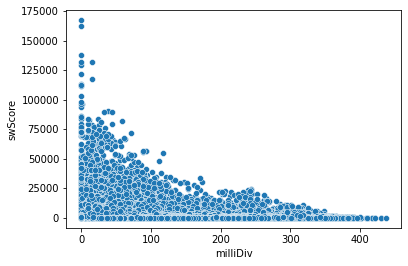

In [23]:
sns.scatterplot(
    data=repeats,
    x="milliDiv",
    y="swScore",
)

In [24]:
repeats.sort_values("milliDiv", ascending=True).head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
23945,652,1537,0,0,0,Chr2,8816055,8816229,-10882060,-,ATCopia72LTR,LTR,Copia,0,174,1,2,0
64824,724,24,0,0,0,Chr5,18314110,18314136,-8661366,+,(A)n,Simple_repeat,Simple_repeat,1,26,0,5,0
30184,599,19,0,0,0,Chr3,1874546,1874567,-21585263,+,(CT)n,Simple_repeat,Simple_repeat,1,21,0,2,0
4720,668,19,0,42,0,Chr1,10968954,10968978,-19458693,+,(TA)n,Simple_repeat,Simple_repeat,1,25,0,4,42
4719,668,8071,0,0,0,Chr1,10966962,10967864,-19459807,-,Sadhu1-2,SINE,SINE,0,902,1,4,0
30189,599,29,0,0,0,Chr3,1896249,1896274,-21563556,+,(TC)n,Simple_repeat,Simple_repeat,1,25,0,2,0
12205,739,18,0,0,0,Chr1,20251234,20251257,-10176414,+,(GAT)n,Simple_repeat,Simple_repeat,1,23,0,1,0
64832,724,17,0,0,0,Chr5,18331094,18331113,-8644389,+,(A)n,Simple_repeat,Simple_repeat,1,19,0,5,0
64835,724,19,0,0,0,Chr5,18334258,18334279,-8641223,+,(A)n,Simple_repeat,Simple_repeat,1,21,0,5,0
43042,763,38,0,0,0,Chr3,23416408,23416443,-43387,+,(AAG)n,Simple_repeat,Simple_repeat,1,35,0,3,0


<AxesSubplot:>

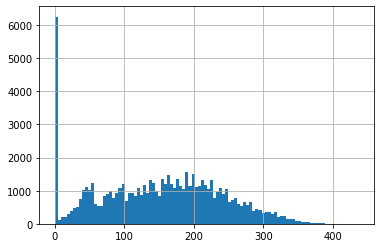

In [25]:
repeats.milliDiv.hist(bins=100)

<AxesSubplot:>

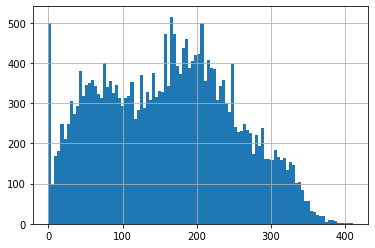

In [49]:
repeats[~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])].milliDiv.hist(bins=100)

<AxesSubplot:>

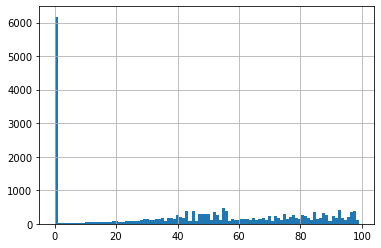

In [27]:
repeats[repeats.milliDiv < 100].milliDiv.hist(bins=100)

In [28]:
repeats[repeats.milliDiv > 0].sort_values("milliDiv", ascending=True).head(50)

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
10891,721,15609,1,0,0,Chr1,17842314,17844027,-12583644,+,ATMU7,DNA,MULE-MuDR,2,1714,-1420,9,1
33324,653,54485,1,0,0,Chr3,9011212,9017190,-14442640,-,TA11,LINE,L1,0,5976,1,3,1
22437,634,31825,1,0,0,Chr2,6446777,6450277,-13248012,+,ATHAT7,DNA,hAT-Ac,1,3500,0,2,1
59029,662,70054,1,0,0,Chr5,10153031,10160907,-16814595,-,Vandal5A,DNA,MULE-MuDR,0,7727,1,5,1
5835,681,96151,1,0,0,Chr1,12674459,12684931,-17742740,-,Vandal16,DNA,MULE-MuDR,0,10472,1,5,1
37755,693,17762,1,0,2,Chr3,14197589,14199495,-9260335,+,SSU-rRNA_Ath,rRNA,rRNA,1,1902,0,3,3
17428,586,49377,1,0,0,Chr2,243803,249211,-19449078,-,ATLINEIII,LINE,L1,0,5408,1,1,1
12845,749,21928,1,24,0,Chr1,21525434,21529415,-8898256,-,ATCopia78_I-int,LTR,Copia,0,4077,1,1,25
26077,680,69699,1,0,0,Chr2,12566154,12578422,-7119867,+,Vandal14,DNA,MULE-MuDR,1,12268,0,2,1
63227,704,42368,1,0,0,Chr5,15671629,15676260,-11299242,-,ATCopia83_I-int,LTR,Copia,-12,4631,1,5,1


<AxesSubplot:xlabel='milliDiv', ylabel='repClass'>

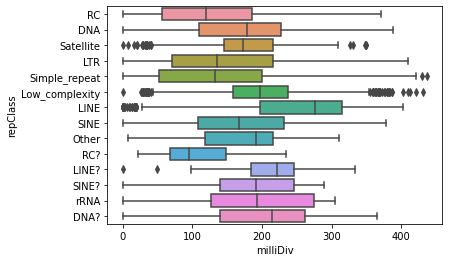

In [29]:
sns.boxplot(
    data=repeats,
    y="repClass",
    x="milliDiv",
)

<AxesSubplot:xlabel='milliDiv', ylabel='repFamily'>

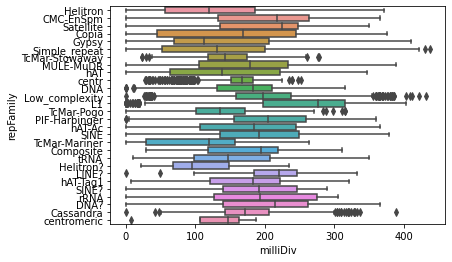

In [30]:
sns.boxplot(
    data=repeats,
    y="repFamily",
    x="milliDiv",
)

In [31]:
(repeats.milliDiv <= 50).mean()

0.17180762852404644

In [32]:
(repeats.milliDiv <= 100).mean()

0.3175859831278391

In [33]:
repeats[repeats.start==24667282]

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
67993,773,225,143,20,20,Chr5,24667282,24667332,-2308170,+,ATLINEIII,LINE,L1,7,56,-5352,6,183


In [35]:
repeats[repeats.repClass=="Low_complexity"].sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
3301,645,13,0,129,29,Chr1,7906706,7906737,-22520934,+,GA-rich,Low_complexity,Low_complexity,1,34,0,3,158
54783,596,21,27,132,0,Chr5,1500697,1500735,-25474767,+,GA-rich,Low_complexity,Low_complexity,1,43,0,5,159
17055,814,19,28,71,71,Chr1,30048356,30048398,-379273,+,GA-rich,Low_complexity,Low_complexity,1,42,0,1,170
29755,591,16,29,77,50,Chr3,913579,913618,-22546212,+,GA-rich,Low_complexity,Low_complexity,1,40,0,2,156
15344,785,16,29,108,25,Chr1,26293006,26293043,-4134628,+,GA-rich,Low_complexity,Low_complexity,1,40,0,1,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,685,19,402,0,8,Chr1,13237492,13237613,-17190058,+,GA-rich,Low_complexity,Low_complexity,1,120,0,6,410
16301,801,12,409,0,0,Chr1,28354163,28354240,-2073431,+,A-rich,Low_complexity,Low_complexity,1,77,0,1,409
13197,753,18,412,0,0,Chr1,22128315,22128407,-8299264,+,GA-rich,Low_complexity,Low_complexity,1,92,0,1,412
64291,717,18,421,0,0,Chr5,17389253,17389350,-9586152,+,GA-rich,Low_complexity,Low_complexity,1,97,0,5,421


In [36]:
repeats[repeats.repClass=="Simple_repeat"].sort_values("milliDiv")

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
52397,698,22,0,0,0,Chr4,14924031,14924055,-3661001,+,(AT)n,Simple_repeat,Simple_repeat,1,24,0,4,0
9043,704,50,0,0,0,Chr1,15641484,15641529,-14786142,+,(AAT)n,Simple_repeat,Simple_repeat,1,45,0,8,0
25006,665,16,0,0,0,Chr2,10569993,10570011,-9128278,+,(T)n,Simple_repeat,Simple_repeat,1,18,0,2,0
65074,727,19,0,0,0,Chr5,18723568,18723589,-8251913,+,(GA)n,Simple_repeat,Simple_repeat,1,21,0,5,0
54040,726,57,0,0,0,Chr4,18572970,18573019,-12037,+,(AG)n,Simple_repeat,Simple_repeat,1,49,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57619,645,16,418,0,0,Chr5,7979382,7979465,-18996037,+,(TT)n,Simple_repeat,Simple_repeat,1,83,0,5,418
47856,631,255,418,6,35,Chr4,6057317,6057362,-12527694,+,(TGG)n,Simple_repeat,Simple_repeat,2,192,0,4,459
47070,624,12,421,0,0,Chr4,5150436,5150508,-13434548,+,(ATTATT)n,Simple_repeat,Simple_repeat,1,72,0,4,421
4099,659,244,430,6,35,Chr1,9707864,9708040,-20719631,+,(TGG)n,Simple_repeat,Simple_repeat,3,173,0,3,471


In [40]:
bf.merge(repeats).apply(lambda row: row.end-row.start, axis=1).sum()

19413455

In [43]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 50)]).apply(lambda row: row.end-row.start, axis=1).sum()

5567172

In [48]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 80)]).apply(lambda row: row.end-row.start, axis=1).sum()

8543556

In [44]:
bf.merge(repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 100)]).apply(lambda row: row.end-row.start, axis=1).sum()

10108765

In [47]:
repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 50)]

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6,31
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8,99
10,85,131959,15,5,3,Chr1,12713487,12728541,-17699130,+,Vandal2,DNA,MULE-MuDR,1,15072,-181,5,23
11,85,20809,36,29,1,Chr1,12842883,12845445,-17582226,+,ATCopia36_I-int,LTR,Copia,1548,4180,0,5,66
15,87,66810,40,6,0,Chr1,14807627,14815548,-15612123,+,Athila6B_I-int,LTR,Gypsy,1,7963,0,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69248,586,313,26,0,0,ChrC,152355,152394,-2084,+,Atlantys3_I-int,LTR,Gypsy,4853,4891,-4777,6,26
69263,585,543,0,0,0,ChrM,47742,47800,-319124,-,ATREP12,RC,Helitron,-983,359,302,6,0
69265,585,291,0,0,0,ChrM,51162,51194,-315730,-,ATREP12,RC,Helitron,-953,389,358,6,0
69285,586,298,0,0,0,ChrM,135420,135454,-231470,-,Athila7_I-int,LTR,Gypsy,-9174,814,781,6,0


In [46]:
repeats[(~repeats.repClass.isin(["Low_complexity", "Simple_repeat"])) & (repeats.milliDiv <= 100)]

,#bin,swScore,milliDiv,milliDel,milliIns,chrom,start,end,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id,mutation_load
1,10,6899,30,0,1,Chr1,13630758,13631561,-16796110,-,ATENSPM2,DNA,CMC-EnSpm,-6268,1985,1184,6,31
2,10,2521,72,3,2,Chr1,14676131,14685672,-15741999,-,AR3,Satellite,Satellite,-73,9553,1,6,77
3,10,6227,45,48,6,Chr1,15728234,15729041,-14698630,+,ATCopia95LTR,LTR,Copia,1,841,0,8,99
10,85,131959,15,5,3,Chr1,12713487,12728541,-17699130,+,Vandal2,DNA,MULE-MuDR,1,15072,-181,5,23
11,85,20809,36,29,1,Chr1,12842883,12845445,-17582226,+,ATCopia36_I-int,LTR,Copia,1548,4180,0,5,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69265,585,291,0,0,0,ChrM,51162,51194,-315730,-,ATREP12,RC,Helitron,-953,389,358,6,0
69285,586,298,0,0,0,ChrM,135420,135454,-231470,-,Athila7_I-int,LTR,Gypsy,-9174,814,781,6,0
69289,586,248,88,0,87,ChrM,143883,143933,-222991,+,ATSAT5,Satellite,Satellite,880,925,-1271,6,175
69291,586,543,0,0,0,ChrM,181907,181965,-184959,-,ATREP12,RC,Helitron,-983,359,302,6,0
